In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the Improved MLP model
class ImprovedMLP(nn.Module):
    def __init__(self):
        super(ImprovedMLP, self).__init__()
        # Input layer (28x28 = 784) -> First hidden layer with 512 neurons
        self.fc1 = nn.Linear(28 * 28, 512)
        # Second hidden layer with 256 neurons
        self.fc2 = nn.Linear(512, 256)
        # Output layer with 10 neurons (one for each digit class)
        self.fc3 = nn.Linear(256, 10)

        # Activation function (ReLU for non-linearity)
        self.relu = nn.ReLU()
        # Softmax activation for probabilities (not used during training)
        self.softmax = nn.Softmax(dim=1)

        # Dropout layer to prevent overfitting (30% of neurons randomly disabled during training)
        self.dropout = nn.Dropout(0.3)

        # Batch normalization layers to stabilize training
        self.bn1 = nn.BatchNorm1d(512)  # Normalizes after the first hidden layer
        self.bn2 = nn.BatchNorm1d(256)  # Normalizes after the second hidden layer

    def forward(self, x):
        # Flatten the input from (batch_size, 1, 28, 28) to (batch_size, 784)
        x = x.view(-1, 28 * 28)
        # First layer: Linear -> BatchNorm -> ReLU -> Dropout
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Second layer: Linear -> BatchNorm -> ReLU -> Dropout
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)

        # Output layer: Linear (no softmax here as CrossEntropyLoss expects raw logits)
        x = self.fc3(x)
        return x

# Set the device to GPU if available, otherwise CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset with transformations
transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize pixel values to range [-1, 1]
])

# Load training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # Shuffle training data
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # No shuffle for test data

# Instantiate the model, loss function, and optimizer
model = ImprovedMLP().to(device)  # Send the model to the selected device (CPU/GPU)
criterion = nn.CrossEntropyLoss()  # Loss function for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with a learning rate of 0.001

# Training loop
epochs = 10  # Number of epochs
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0  # Track the cumulative loss for the epoch
    correct = 0  # Track the number of correct predictions
    total = 0  # Track the total number of samples

    # Iterate through the training data
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Send data to the device

        # Forward pass: Compute predictions
        outputs = model(inputs)
        loss = criterion(outputs, labels)  # Compute the loss

        # Backward pass: Compute gradients and update weights
        optimizer.zero_grad()  # Reset gradients
        loss.backward()  # Compute gradients
        optimizer.step()  # Update weights

        # Update statistics for accuracy calculation
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += labels.size(0)  # Update total samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

    # Print epoch statistics
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct / total:.2f}%")

# Testing loop
model.eval()  # Set the model to evaluation mode
correct = 0  # Reset correct predictions count
total = 0  # Reset total samples count

# Disable gradient computation for testing
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)  # Send data to the device
        outputs = model(inputs)  # Forward pass
        _, predicted = torch.max(outputs, 1)  # Get class with highest probability
        total += labels.size(0)  # Update total samples
        correct += (predicted == labels).sum().item()  # Count correct predictions

# Print final test accuracy
print(f"Test Accuracy: {100 * correct / total:.2f}%")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.0MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 492kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.43MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.52MB/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch 1/10, Loss: 0.2383, Accuracy: 92.98%
Epoch 2/10, Loss: 0.1222, Accuracy: 96.30%
Epoch 3/10, Loss: 0.0969, Accuracy: 96.94%
Epoch 4/10, Loss: 0.0827, Accuracy: 97.42%
Epoch 5/10, Loss: 0.0687, Accuracy: 97.85%
Epoch 6/10, Loss: 0.0626, Accuracy: 97.95%
Epoch 7/10, Loss: 0.0570, Accuracy: 98.08%
Epoch 8/10, Loss: 0.0513, Accuracy: 98.31%
Epoch 9/10, Loss: 0.0454, Accuracy: 98.50%
Epoch 10/10, Loss: 0.0427, Accuracy: 98.58%
Test Accuracy: 98.45%


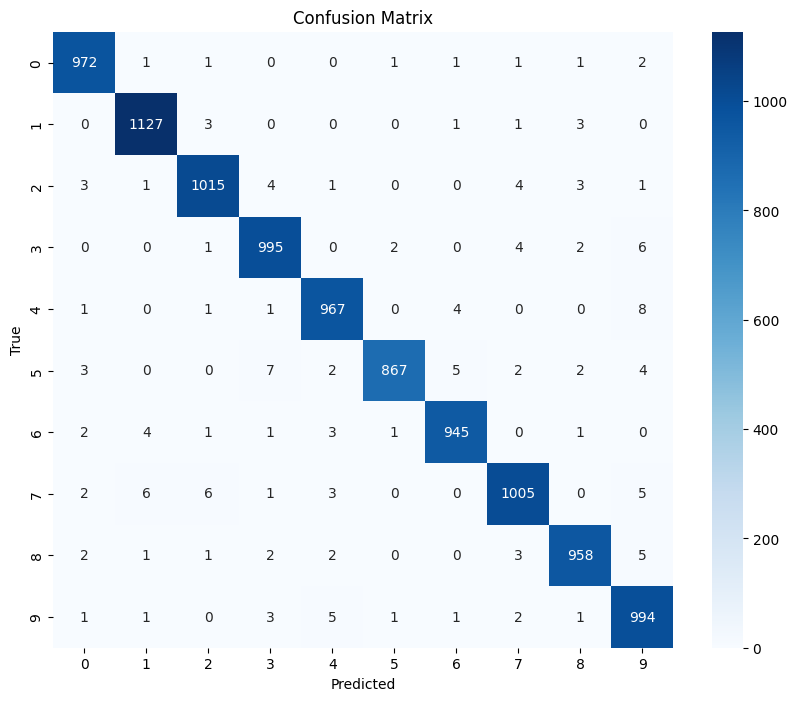

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Initialize lists to store true labels and predicted labels
all_labels = []
all_preds = []

# Set the model to evaluation mode
model.eval()
# Disable gradient computation for the testing phase to save memory and computations
with torch.no_grad():
    # Iterate over the test data
    for inputs, labels in test_loader:
        # Move inputs and labels to the appropriate device (CPU/GPU)
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass: Compute model predictions
        outputs = model(inputs)
        # Get the class with the highest predicted probability for each sample
        _, predicted = torch.max(outputs, 1)

        # Append true labels to `all_labels` (convert to CPU and NumPy for compatibility)
        all_labels.extend(labels.cpu().numpy())
        # Append predicted labels to `all_preds` (convert to CPU and NumPy for compatibility)
        all_preds.extend(predicted.cpu().numpy())

# Compute the confusion matrix using true labels and predicted labels
cm = confusion_matrix(all_labels, all_preds)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # Create a heatmap
            xticklabels=np.arange(10), yticklabels=np.arange(10))  # Add labels for digits
plt.title('Confusion Matrix')  # Set the title of the plot
plt.xlabel('Predicted')  # Label the x-axis as "Predicted"
plt.ylabel('True')  # Label the y-axis as "True"
plt.show()  # Display the plot
